# `20190329a` dual smas

In [1]:
from pyUn0 import *

Not loading RPi.GPIO as not on RPi


### Exploring FFT and different spectral components

Data acquired


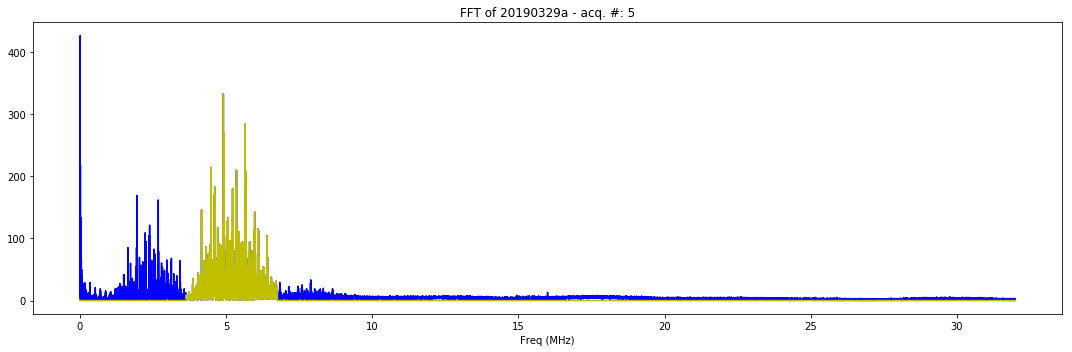

Data acquired


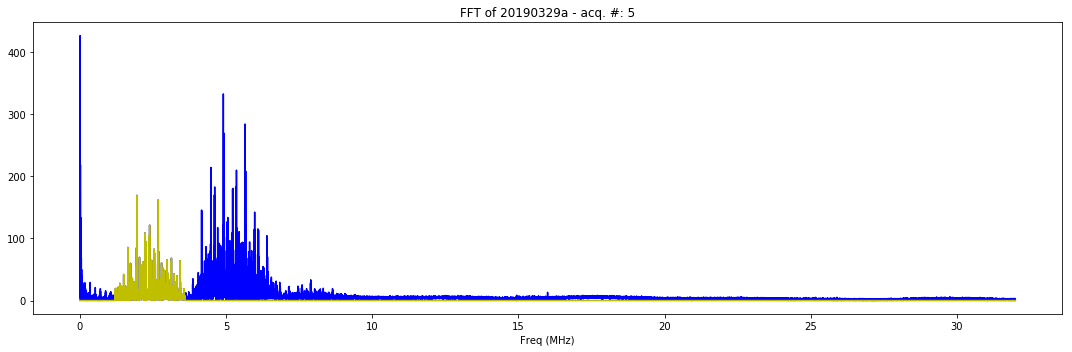

Data acquired


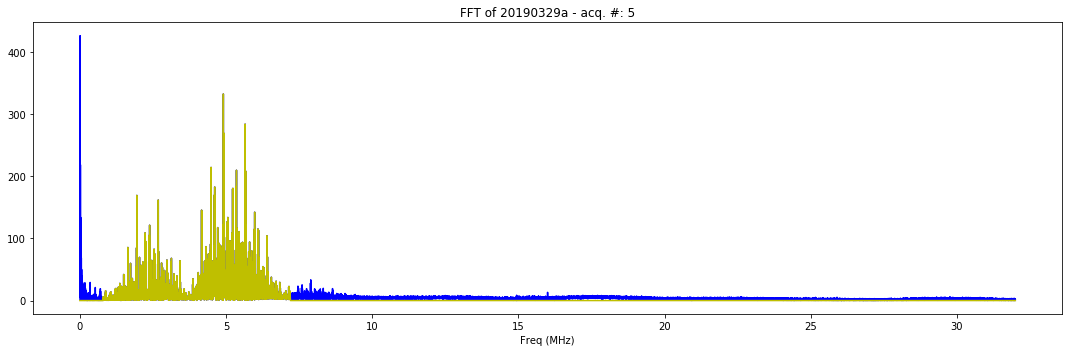

In [25]:
y = us_json()
y.fPiezo = 5.2
y.Bandwidth = 0.60
y.JSONprocessing("./data/20190329a-5.json")
y.create_fft() 

x = us_json()
x.fPiezo = 4.8/2.0
x.Bandwidth = 1.0
x.JSONprocessing("./data/20190329a-5.json")
x.create_fft() 

z = us_json()
z.fPiezo = 4
z.Bandwidth = 1.6
z.JSONprocessing("./data/20190329a-5.json")
z.create_fft() 

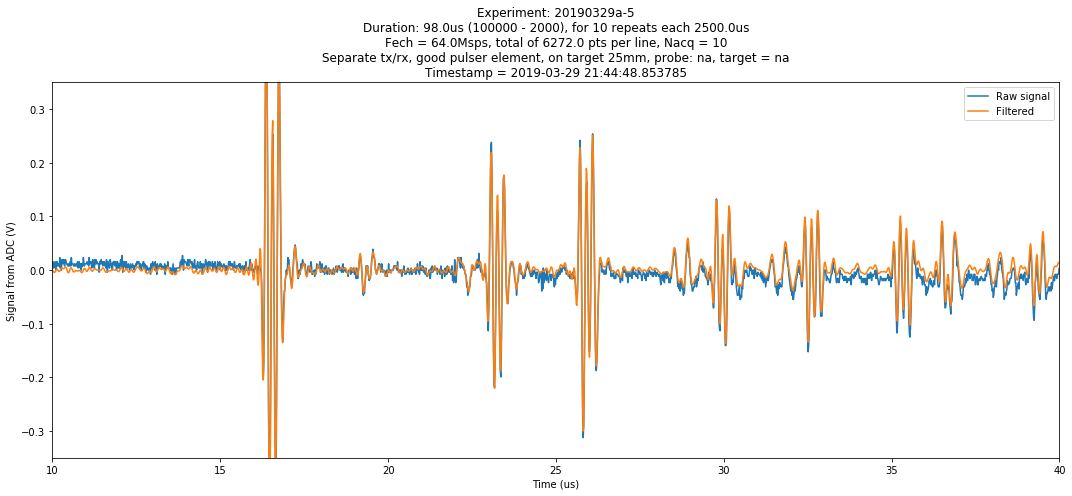

1

In [51]:
fig=plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
minT,maxT=10, 40
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(z.t,z.filtered_signal,label = "Filtered")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()

plt.title(z.create_title_text())
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"

plt.show()
plt.savefig(file_name)
    
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", "Details of acquisition between us "+str(minT)+" and "+ str(maxT)+".")

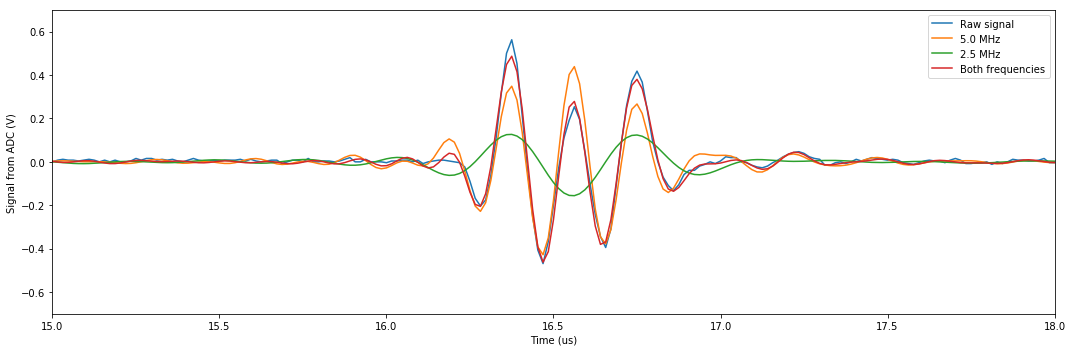

1

In [52]:
fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111)
minT,maxT=15, 18
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(y.t,y.filtered_signal,label = "5.0 MHz")
ax.plot(x.t,x.filtered_signal,label = "2.5 MHz")
ax.plot(z.t,z.filtered_signal,label = "Both frequencies")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.7, 0.7)
ax.legend()

ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"

plt.show()
plt.savefig(file_name)
    
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", "Details of acquisition between us "+str(minT)+" and "+ str(maxT)+".")

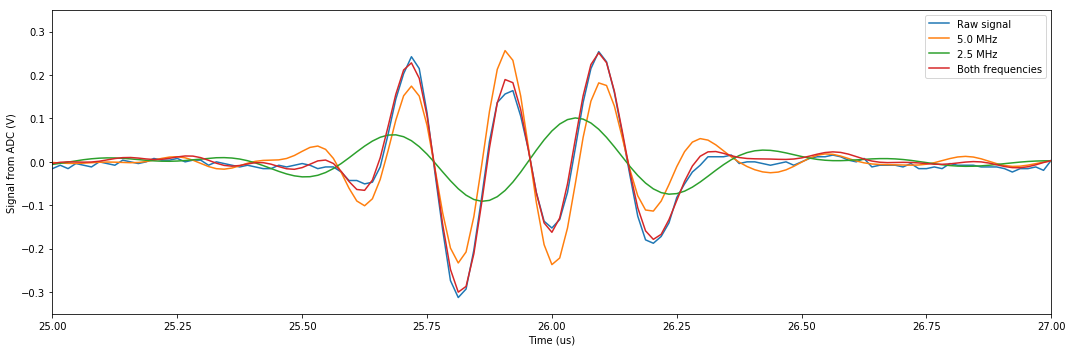

1

In [53]:
fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111)
minT,maxT = 25,27
ax.plot(y.t,y.tmp,label="Raw signal")
ax.plot(y.t,y.filtered_signal,label = "5.0 MHz")
ax.plot(x.t,x.filtered_signal,label = "2.5 MHz")
ax.plot(z.t,z.filtered_signal,label = "Both frequencies")
ax.set_xlim(minT,maxT)
ax.set_ylim(-0.35, 0.35)
ax.legend()
ax.set_xlabel('Time (us)')
ax.set_ylabel('Signal from ADC (V)')
plt.tight_layout()

file_name = "images/details_"+str(minT)+"-"+str(maxT)+"_"+z.iD+"-"+str(z.N)+".jpg"

plt.show()
plt.savefig(file_name)
    
tag_image(file_name,"matty,dualNDT5MHz", "20190329a", "graph", "Details of acquisition between us "+str(minT)+" and "+ str(maxT)+".")